<div style='background-image: url("image/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Scientific Visualization with Python</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">A super quick crash course</div>
        </div>
    </div>
</div>

---
# Data visualization in Python
## Part I: Simple plots

### Before we start

Create conda environment

https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

To add new environment to the notebook

```
source activate env
conda install jupyter
```

---

Seismo-Live: http://seismo-live.org

##### Modified from original Authors:
* Stephanie Wollherr ([@swollherr](https://github.com/swollherr))

---

This notebook introduces some basic plotting examples using matplotlib.

In [1]:
#we need the following packages, always execute this cell at the beginning

#plots inside the notebook
%matplotlib inline

#you can use these libraries by refering to their appreviation plt., np. or pd.
#basic plotting library
import matplotlib.pyplot as plt

#scientifc computing library
import numpy as np

#data analysis tool
import pandas as pd

# Reading in your data

To handle data in python we first have to read it in.
### Simple ascii/txt/csv files.

#### loadtxt by numpy

In [4]:
!ls data/

station_1.dat station_2.dat


In [5]:
!cat data/station_1.dat

# Broadband (3D) simulated ground motion for 1992 Landers EQ
# 
# Station: luc
#    longitude: -116.61250
#    latitude: 34.56900
#    closest distance to fault (km): 1.42
#    Vs30 (m/s): 685
# 
# Data fields are TAB-separated
# 
# Column 1: Time (s)
# Column 2: North-south acceleration (cm/s/s) (+ is northward)
# Column 3: East-west acceleration (cm/s/s) (+ is eastward)
# Column 4: Up-down acceleration (cm/s/s) (+ is upward)
#
#Time NS EW UD
1.490116e-08	7.943640e-03	-7.501860e-04	-1.538980e-02
2.500002e-02	8.244470e-03	-6.003400e-04	-1.570730e-02
5.000002e-02	8.537840e-03	-4.335790e-04	-1.601830e-02
7.500002e-02	8.838140e-03	-2.540470e-04	-1.632330e-02
1.000000e-01	9.147760e-03	-6.478820e-05	-1.662180e-02
1.250000e-01	9.452510e-03	1.257930e-04	-1.691310e-02
1.500000e-01	9.750920e-03	3.221840e-04	-1.719620e-02
1.750000e-01	1.005470e-02	5.378000e-04	-1.747190e-02
2.000000e-01	1.036790e-02	7.734750e-04	-1.773940e-02
2.250000e-01	1.068050e-02	1.018650e-03	-1.799920e-02
2.500000e-01	1.09

5.867500e+01	-7.481000e-02	-3.184320e-02	-2.018510e-02
5.870000e+01	-7.525840e-02	-2.703050e-02	-1.857020e-02
5.872500e+01	-7.520340e-02	-2.197560e-02	-1.747910e-02
5.875000e+01	-7.457960e-02	-1.662610e-02	-1.668210e-02
5.877500e+01	-7.341170e-02	-1.107890e-02	-1.604610e-02
5.880000e+01	-7.181150e-02	-5.398980e-03	-1.574850e-02
5.882500e+01	-6.990060e-02	2.487000e-04	-1.573740e-02
5.885000e+01	-6.775280e-02	5.829680e-03	-1.620160e-02
5.887500e+01	-6.534330e-02	1.138040e-02	-1.722560e-02
5.890000e+01	-6.256910e-02	1.691630e-02	-1.829880e-02
5.892500e+01	-5.943500e-02	2.240260e-02	-1.941260e-02
5.895000e+01	-5.600170e-02	2.782450e-02	-2.095850e-02
5.897500e+01	-5.235700e-02	3.296450e-02	-2.280160e-02
5.900000e+01	-4.858470e-02	3.764480e-02	-2.475320e-02
5.902500e+01	-4.467650e-02	4.182440e-02	-2.678070e-02
5.905000e+01	-4.061330e-02	4.550270e-02	-2.871090e-02
5.907500e+01	-3.647120e-02	4.876380e-02	-3.060020e-02
5.910000e+01	-3.230040e-02	5.174360e-02	-3.269570e-02
5.912500e+01	-2.805070

9.317500e+01	-6.878660e-03	2.370260e-01	8.727380e-03
9.320000e+01	-9.664610e-03	2.547790e-01	2.338280e-03
9.322500e+01	-1.217920e-02	2.715080e-01	-4.104770e-03
9.325000e+01	-1.445720e-02	2.871950e-01	-1.091060e-02
9.327500e+01	-1.642630e-02	3.018490e-01	-1.800920e-02
9.330000e+01	-1.802420e-02	3.154220e-01	-2.512940e-02
9.332500e+01	-1.926400e-02	3.278190e-01	-3.216370e-02
9.335000e+01	-2.017840e-02	3.389370e-01	-3.909180e-02
9.337500e+01	-2.087030e-02	3.487580e-01	-4.598050e-02
9.340000e+01	-2.141400e-02	3.573410e-01	-5.287390e-02
9.342500e+01	-2.170660e-02	3.647270e-01	-5.963000e-02
9.345000e+01	-2.168110e-02	3.708720e-01	-6.608930e-02
9.347500e+01	-2.138280e-02	3.756890e-01	-7.236670e-02
9.350000e+01	-2.082510e-02	3.790750e-01	-7.844960e-02
9.352500e+01	-2.003690e-02	3.809990e-01	-8.411900e-02
9.355000e+01	-1.908010e-02	3.815930e-01	-8.943870e-02
9.357500e+01	-1.791800e-02	3.810440e-01	-9.442320e-02
9.360000e+01	-1.646860e-02	3.793820e-01	-9.891790e-02
9.362500e+01	-1.477270e-02	3.7

1.585000e+02	8.652970e-03	3.179270e-02	-9.279440e-04
1.585250e+02	8.652710e-03	3.179380e-02	-9.280420e-04
1.585500e+02	8.651810e-03	3.179410e-02	-9.281330e-04
1.585750e+02	8.651830e-03	3.179370e-02	-9.282690e-04
1.586000e+02	8.652400e-03	3.179380e-02	-9.283290e-04
1.586250e+02	8.652160e-03	3.179430e-02	-9.283380e-04
1.586500e+02	8.650980e-03	3.179520e-02	-9.283580e-04
1.586750e+02	8.650960e-03	3.179580e-02	-9.283570e-04
1.587000e+02	8.651970e-03	3.179630e-02	-9.283920e-04
1.587250e+02	8.651930e-03	3.179610e-02	-9.283460e-04
1.587500e+02	8.651090e-03	3.179540e-02	-9.283070e-04
1.587750e+02	8.651080e-03	3.179520e-02	-9.282110e-04
1.588000e+02	8.651980e-03	3.179580e-02	-9.281030e-04
1.588250e+02	8.652510e-03	3.179630e-02	-9.280300e-04
1.588500e+02	8.652470e-03	3.179600e-02	-9.279840e-04
1.588750e+02	8.653010e-03	3.179480e-02	-9.280200e-04
1.589000e+02	8.654150e-03	3.179420e-02	-9.280890e-04
1.589250e+02	8.654320e-03	3.179430e-02	-9.282200e-04
1.589500e+02	8.653470e-03	3.179430e-02	-9.2841

In [ ]:
!%cat data/station_1.dat

In [6]:
#read in a seismogram
#4 columns with 
#time North-South East-West Up-Down
time, ns, ew, ud = np.loadtxt('data/station_1.dat').T
print(time)
print(ns)

[1.490116e-08 2.500002e-02 5.000002e-02 ... 1.599000e+02 1.599250e+02
 1.599500e+02]
[0.00794364 0.00824447 0.00853784 ... 0.00865288 0.00865299 0.00865258]


In [7]:
type(time)

numpy.ndarray

usefull parameters for loadtxt:
- comments : The characters or list of characters used to indicate the start of a comment; default: ‘#’.
- skiprows : Skip the first skiprows lines; default: 0.
- usecols : Which columns to read, with 0 being the first. For example, usecols = (1,4,5) will extract the 2nd, 5th and 6th columns. The default, None, results in all columns being read.

In [ ]:
#in action: we only need the time series and the North-South component
time, ns = np.loadtxt('data/station_1.dat', usecols=(0,1)).T
print(time)
print(ns)

#### read_csv by pandas
much faster than loadtxt, in particular for large files

In [8]:
#read it in without any specifications
data_pd = pd.read_csv('data/station_1.dat')
print (data_pd)

     # Broadband (3D) simulated ground motion for 1992 Landers EQ
0                                                    #           
1                                        # Station: luc          
2                            #    longitude: -116.61250          
3                               #    latitude: 34.56900          
4             #    closest distance to fault (km): 1.42          
5                                  #    Vs30 (m/s): 685          
6                                                    #           
7                       # Data fields are TAB-separated          
8                                                    #           
9                                  # Column 1: Time (s)          
10    # Column 2: North-south acceleration (cm/s/s) ...          
11    # Column 3: East-west acceleration (cm/s/s) (+...          
12    # Column 4: Up-down acceleration (cm/s/s) (+ i...          
13                                                    #          
14        

**It reads in everything!**

So we have to set a couple of parameters. Possible parameters that we can set:
- sep : string; delimiter to use; default ‘,’ 
- header : integer or list of integers; row number(s) to use as the column names and the start of the data
- names :  List of column names to use. If file contains no header row, then you should explicitly pass header=None; array-like; default None.
- usecols : Return a subset of the columns; array-like or callable; default None. 
- skiprows : Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file; list-like or integer or callable; default None. 

... and many more: full list available at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Let's try this again:

In [9]:
#files uses tab-seperation, so we'll let read_csv know
#names can be used for header names, header can also be read in but now we're skipping them with comment='#'
data_pd = pd.read_csv('data/station_1.dat', sep = '\t', comment='#', names=['time','NS','EW', 'UD'])
print (data_pd)

              time        NS        EW        UD
0     1.490116e-08  0.007944 -0.000750 -0.015390
1     2.500002e-02  0.008244 -0.000600 -0.015707
2     5.000002e-02  0.008538 -0.000434 -0.016018
3     7.500002e-02  0.008838 -0.000254 -0.016323
4     1.000000e-01  0.009148 -0.000065 -0.016622
5     1.250000e-01  0.009453  0.000126 -0.016913
6     1.500000e-01  0.009751  0.000322 -0.017196
7     1.750000e-01  0.010055  0.000538 -0.017472
8     2.000000e-01  0.010368  0.000773 -0.017739
9     2.250000e-01  0.010681  0.001019 -0.017999
10    2.500000e-01  0.010990  0.001263 -0.018251
11    2.750000e-01  0.011309  0.001509 -0.018495
12    3.000000e-01  0.011637  0.001766 -0.018731
13    3.250000e-01  0.011960  0.002034 -0.018959
14    3.500000e-01  0.012278  0.002313 -0.019179
15    3.750000e-01  0.012606  0.002603 -0.019391
16    4.000000e-01  0.012944  0.002897 -0.019593
17    4.250000e-01  0.013281  0.003189 -0.019787
18    4.500000e-01  0.013623  0.003475 -0.019971
19    4.750000e-01  

In [11]:
len(data_pd.columns)

4

Now we can nicely refer to our data with:

In [13]:
print('time')
print (data_pd['time'])

time
0       1.490116e-08
1       2.500002e-02
2       5.000002e-02
3       7.500002e-02
4       1.000000e-01
5       1.250000e-01
6       1.500000e-01
7       1.750000e-01
8       2.000000e-01
9       2.250000e-01
10      2.500000e-01
11      2.750000e-01
12      3.000000e-01
13      3.250000e-01
14      3.500000e-01
15      3.750000e-01
16      4.000000e-01
17      4.250000e-01
18      4.500000e-01
19      4.750000e-01
20      5.000000e-01
21      5.250000e-01
22      5.500000e-01
23      5.750000e-01
24      6.000000e-01
25      6.250000e-01
26      6.500000e-01
27      6.750000e-01
28      7.000000e-01
29      7.250000e-01
            ...     
6369    1.592250e+02
6370    1.592500e+02
6371    1.592750e+02
6372    1.593000e+02
6373    1.593250e+02
6374    1.593500e+02
6375    1.593750e+02
6376    1.594000e+02
6377    1.594250e+02
6378    1.594500e+02
6379    1.594750e+02
6380    1.595000e+02
6381    1.595250e+02
6382    1.595500e+02
6383    1.595750e+02
6384    1.596000e+02
6385    

### Other data formats

There are other possibilties to read in your data when it's not in ascii format.

For example, we will later use netcdf-based data formats in the second tutorial.

More packages for handling data input:
- netcdf4 package (Network Common Data Form)
- read in hdf with panda (Hierarchical Data Format)

**What kind of data format are you using?**




## Plotting your data - Simple Plots

Matplotlib is a widely used plotting library that we will use here for our first simple plots.

1. Single Figures
2. Axis labels, titles
3. Subplots
4. Styles
5. Scatter plots
6. Other types of plots
7. How to save your plots


## 1. Single figures
Call the plotting function together with its package that we called 'plt'.

The plot gets visible by inserting plt.show() at the end.

In [14]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_autogen_docstring',
 '_backend_mod',
 '_backend_selection',
 '_hold_msg',
 '_imread',
 '_imsave',
 '_interactive_bk',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 '_string_to_bool',
 'absolute_import',


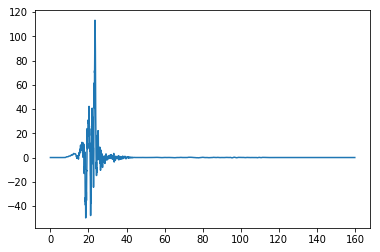

In [15]:
plt.plot(data_pd['time'], data_pd['NS'])
plt.show()

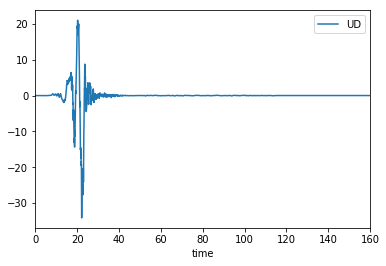

In [20]:
data_pd.plot(x='time',y='UD',kind='line')

## 2. Labels and titles
Let's insert more information!
- label the axis
- insert a legend
- give a title

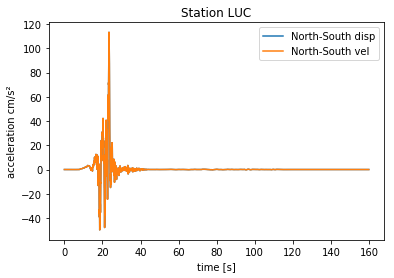

In [23]:
#default label is the name of the array, but you can also label it with a own name

plt.plot(data_pd['time'], data_pd['NS'],label="North-South disp")
plt.plot(data_pd['time'], data_pd['NS'],label="North-South vel")
#plt.plot(data_pd['time'],data_pd['NS'], label='North-South')

plt.legend()

#axis labels
plt.xlabel('time [s]')
plt.ylabel('acceleration cm/s²')

#title
plt.title('Station LUC')

plt.show()

## 3. Subplots

We now want to plot all three components of the seismogram in one single plot.

Subplots are structured as follows:
<img src="image/subplots.png" style="width:70%"></img>

We will now introduce three axis in one figure.

In [ ]:
plt.x

/Users/nghianc/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


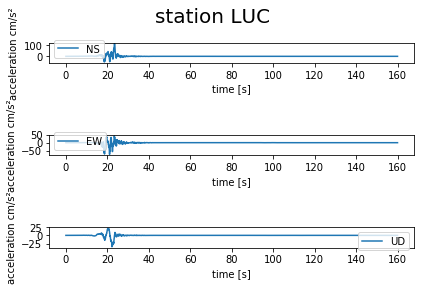

In [24]:
#create a figure f and three subplots
f, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.plot(data_pd['time'], data_pd['NS'])
#for axis properties we use set_*
ax1.set_xlabel('time [s]')
ax1.set_ylabel('acceleration cm/s²')
ax1.legend()

ax2.plot(data_pd['time'], data_pd['EW'])
ax2.set_xlabel('time [s]')
ax2.set_ylabel('acceleration cm/s²')
ax2.legend()

ax3.plot(data_pd['time'], data_pd['UD'])
ax3.set_xlabel('time [s]')
ax3.set_ylabel('acceleration cm/s²')
ax3.legend()


#plot title over all subplots
f.suptitle('station LUC', size=20)

#needs to be shifted when tight_layout is used
f.subplots_adjust(top=0.5)
#makes all axis labels visible
f.tight_layout()

f.show()

In [26]:
type(ax1)
dir(ax1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_o

Beautify the plot!
- plots can share axis, plots can even share boxes
- focus on the area of interest

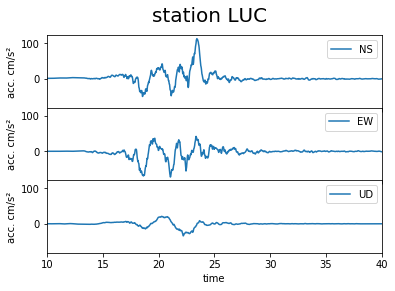

In [27]:
#share x axis
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)

ax1.plot(data_pd['time'], data_pd['NS'])
ax1.set_ylabel('acc. cm/s²')
ax1.legend()

ax2.plot(data_pd['time'], data_pd['EW'])
ax2.set_ylabel('acc. cm/s²')
ax2.legend()

ax3.plot(data_pd['time'], data_pd['UD'])
ax3.set_ylabel('acc. cm/s²')
ax3.set_xlabel('time')
ax3.legend()

#share the box
plt.subplots_adjust(hspace=0)

#reduce number of ticks
plt.locator_params(axis='both', numtick=8)

#focus on the time where the signal is
plt.xlim((10.0,40.0))

#plot title over all subplots
f.suptitle('station LUC', size=20)


plt.show()

## 4. Styles

You can use different style option to render your plot.

Full documentation available here: https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html

In [28]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


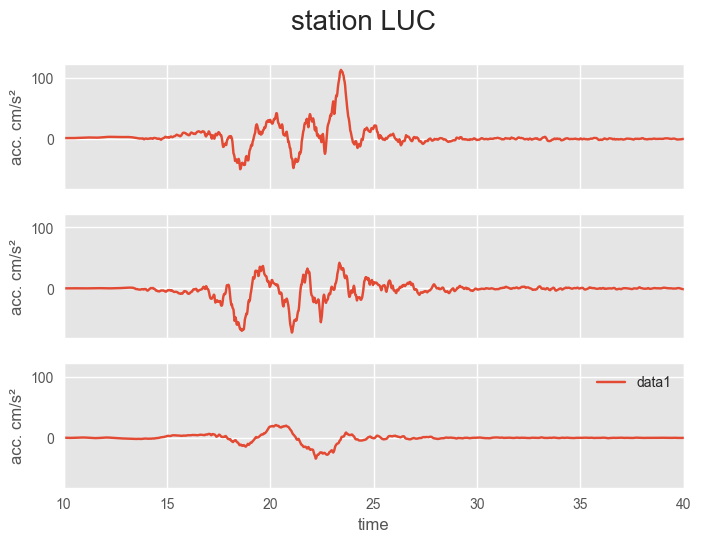

In [31]:
# choose a style from above
plt.style.use('ggplot')

#you can also combine different styles
#plt.style.use(('fivethirtyeight', 'seaborn-white', 'seaborn-pastel'))

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)

ax1.plot(data_pd['time'],data_pd['NS'])
ax1.set_ylabel('acc. cm/s²')

ax2.plot(data_pd['time'],data_pd['EW'])
ax2.set_ylabel('acc. cm/s²')

ax3.plot(data_pd['time'],data_pd['UD'], label='data1')
ax3.set_ylabel('acc. cm/s²')
ax3.set_xlabel('time')
ax3.legend()


#reduce number of ticks
plt.locator_params(axis='both',numtick=8)

#focus on the time where the signal is
plt.xlim((10.0,40.0))

#plot title over all subplots
f.suptitle('station LUC', size=20)


plt.show()

or you can change the **line style and colors**.

In [32]:
#read in another dataset
data2_pd = pd.read_csv('data/station_2.dat', sep = '\t', comment='#', names=['time','NS','EW', 'UD'])

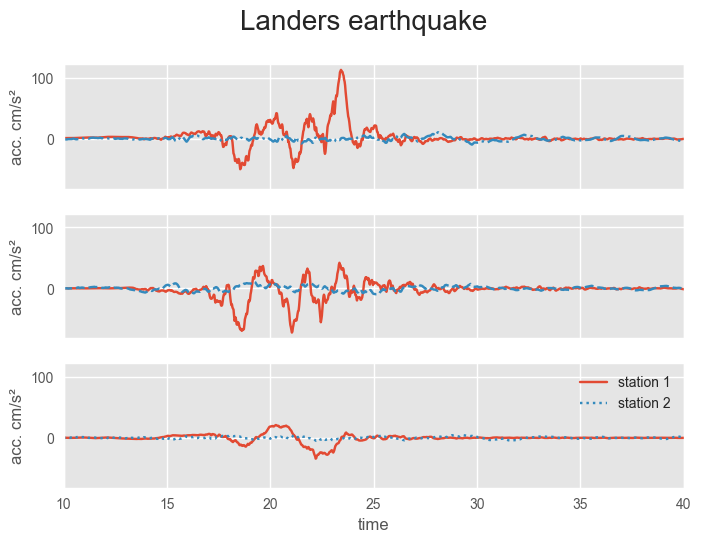

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True)

ax1.plot(data_pd['time'], data_pd['NS'], ms = 5.0)
ax1.plot(data2_pd['time'], data2_pd['NS'], ls='-.')
ax1.set_ylabel('acc. cm/s²')

ax2.plot(data_pd['time'], data_pd['EW'])
ax2.plot(data2_pd['time'], data2_pd['EW'], ls='--')
ax2.set_ylabel('acc. cm/s²')

ax3.plot(data_pd['time'], data_pd['UD'], label='station 1')
ax3.plot(data2_pd['time'], data2_pd['UD'], ls=':', label='station 2')
ax3.set_ylabel('acc. cm/s²')
ax3.set_xlabel('time')
ax3.legend()


#reduce number of ticks
plt.locator_params(axis='both',numtick=8)

#focus on the time where the signal is
plt.xlim((10.0,40.0))

#plot title over all subplots
f.suptitle('Landers earthquake', size=20)


plt.show()

## 5. Scatter Plots

Using scatter plots we can show discrete data, for example measurements in dependence of two (or even three) dimensions.

Full documentation: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html


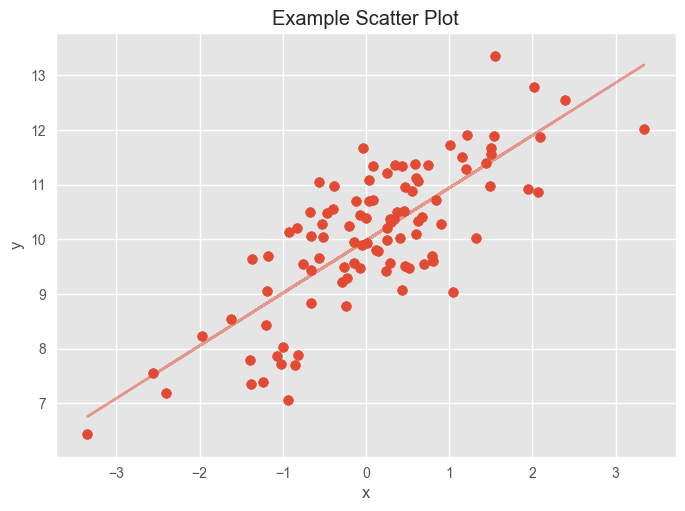

In [40]:
# For this example we first create some random input.
# You can use your own dataset by reading in your data first
x = np.random.randn(100)
y = x + np.random.randn(100) + 10

#-------
# Insert linear fit

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
#we can add some oppacity with alpha (0 to 1)
plt.plot(x, line, alpha=0.5)

#-------
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example Scatter Plot')

plt.scatter(x,y)


plt.show()

Additionally, we can use color and size as a third dimension of information in our scatter plot.

Available colorbars: https://matplotlib.org/users/colormaps.html

/Users/nghianc/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


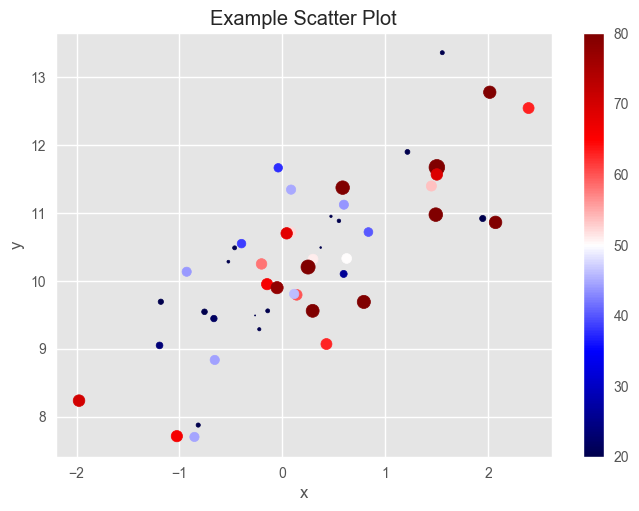

In [55]:
#create a third dimension, for example temperature
z = np.random.randn(100)*70

#plt.scatter(x,y, cmap='viridis', c=z)

#even better to spot the difference: 
#change the size according to the third data dimension
#colorbar can be restricted by vmin and vmax
plt.scatter(x, y, cmap='prism_r', c=z, s=z, vmin=50, vmax=140)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Example Scatter Plot')

cb = plt.colorbar()

#set colorbar axis to customized range
cb.set_clim(20,80)

plt.set_cmap("seismic")

plt.show()

In [56]:
name = 'test'
!echo $name

test


### Additional options on markers and labels

You can customize your scatter plot by adding different markers for different datasets and labels.

Markerstyles can be found here: https://matplotlib.org/api/markers_api.html

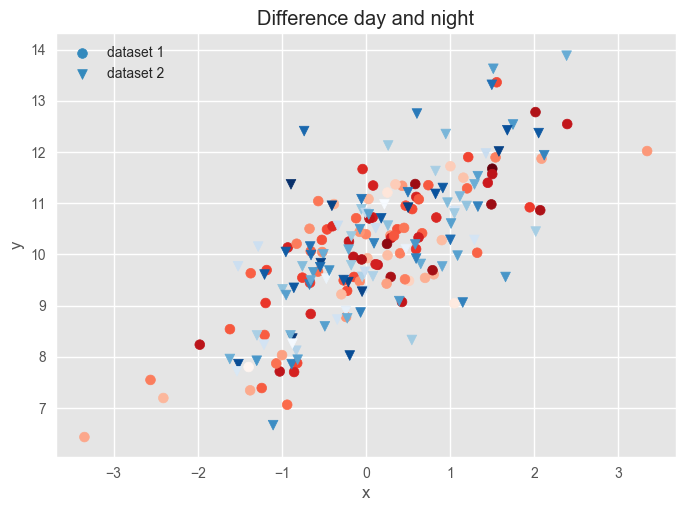

In [57]:
#create a second data set
x_2 = np.random.randn(100)
y_2 = x_2 + np.random.randn(100) + 10
z_2 = np.random.randn(100)*70

#shades of red with z=color itensity
plt.scatter(x, y, cmap='Reds', c=z, label='dataset 1')

#shades of blue with z=color intensity
plt.scatter(x_2, y_2, cmap='Blues', c=z_2, marker ='v', label='dataset 2')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.title('Difference day and night')
plt.show()

### 3D scatter plots

You can also use a  3D figure to plot your three dimensional data set.

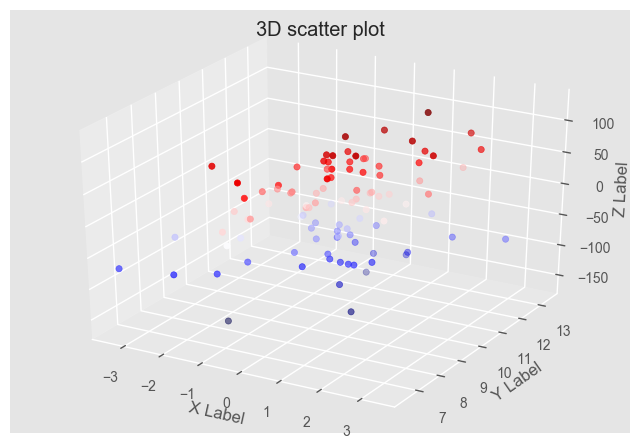

In [58]:
# we need the following package
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colored by the z values
ax.scatter(x, y, z, c=z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('3D scatter plot')
plt.show()

## 6. Other types of plots

Some additional graphics and inspiration.

### Bar plots



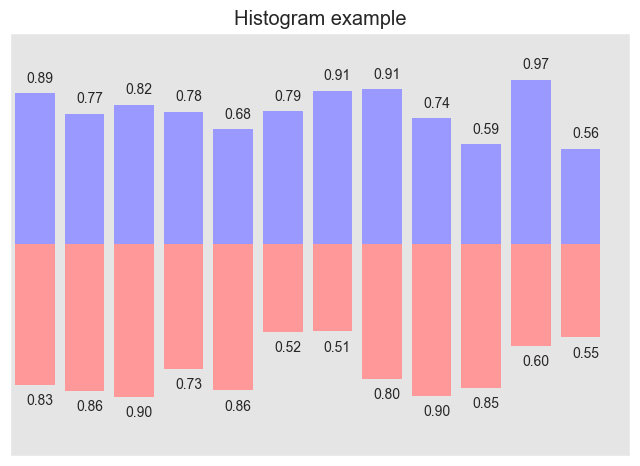

In [63]:
#Generates
n = 12
#creates a array ranging from 0 to 11
X = np.arange(n)

#n random number, uniform distribution
Y1 = np.random.uniform(0.5, 1.0, n)
Y2 = np.random.uniform(0.5, 1.0, n)

#set a face and edge color
plt.bar(X, +Y1, facecolor='#9999ff')
plt.bar(X, -Y2, facecolor='#ff9999')

for x,y in zip(X,Y1):
    #annotations
    #shift the values slightly above the bars
    plt.text(x+0.1, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,Y2):
    plt.text(x+0.1, -y-0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-.5, n)
#remove ticks on x axis
plt.xticks([])

plt.ylim(-1.25, +1.25)
#or fully remove the ticks/labels
plt.yticks([])

plt.title('Histogram example')

plt.show()


### Seaborn

Seaborn is a package dedicated to statistical graphics.

More general information: http://seaborn.pydata.org/examples/

Jointplots combine scatter plots with distribution plots along the two axis.

More information about jointplots: https://seaborn.pydata.org/generated/seaborn.jointplot.html

/Users/nghianc/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nghianc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


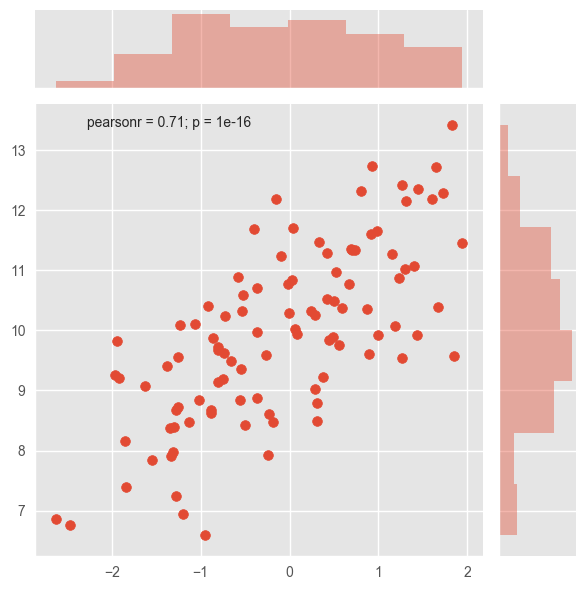

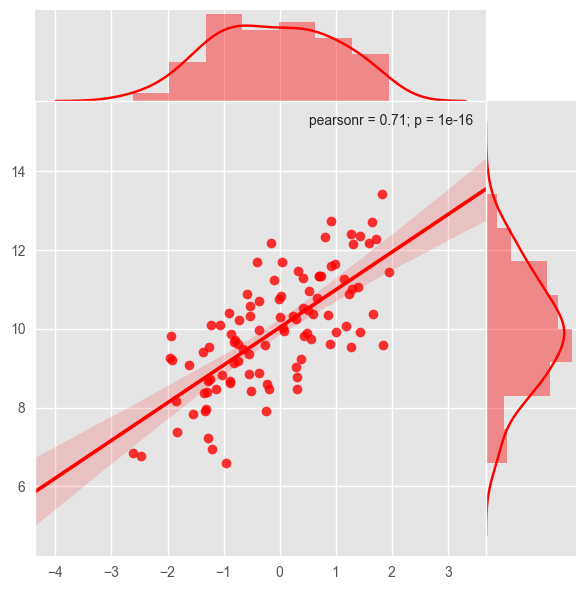

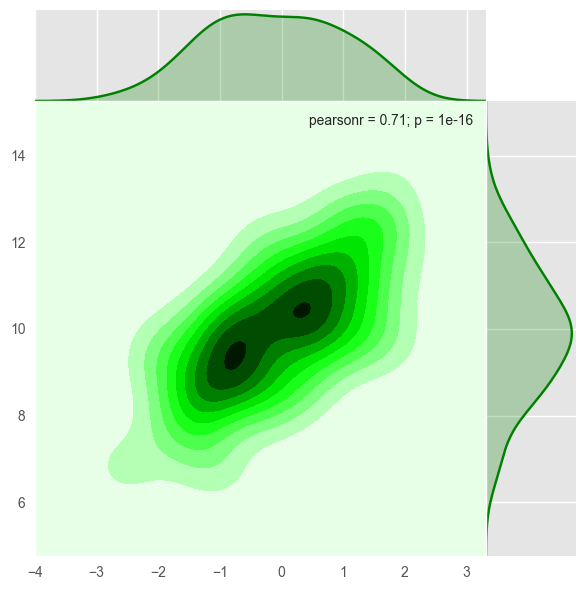

In [64]:
#same random data set as before for the scatter plot
#this time with seaborn
import seaborn as sns

x_2 = np.random.randn(100)
y_2 = x_2 + np.random.randn(100) + 10

#data needs to put into this format
data = pd.DataFrame({"x": x_2, "y": y_2})

#scatter plot with distribution along x and y coordinate
#first plot: default
sns.jointplot(x=x_2, y=y_2, data=data)

#but you can also play around with the "kind" option
#second plot: hex + changed color
sns.jointplot(x=x_2, y=y_2, data=data, kind="reg", space=0, color="r")

#third plot: kde + changed color
sns.jointplot(x=x_2, y=y_2, data=data, kind="kde", space=0, color="g")

plt.show()

Some more inspiration

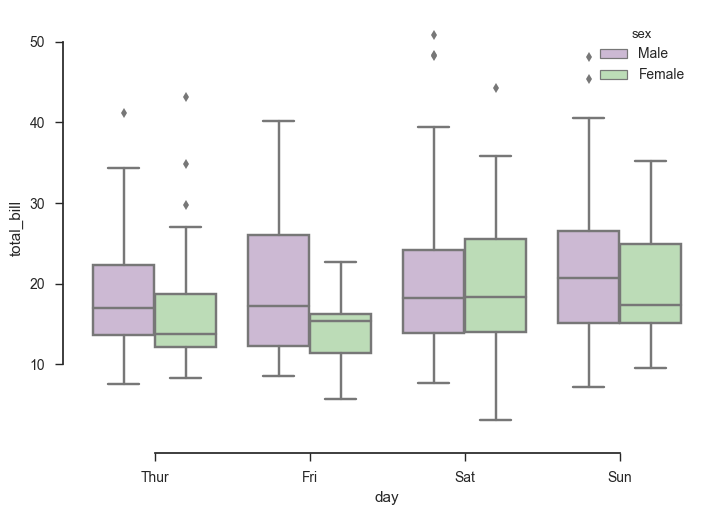

In [65]:
#Error bar plots

sns.set(style="ticks")

#Load the example tips dataset
tips = sns.load_dataset("tips")

#Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")

#This setting removes the borders to minimalize the figure
sns.despine(offset=10, trim=True)

plt.show()

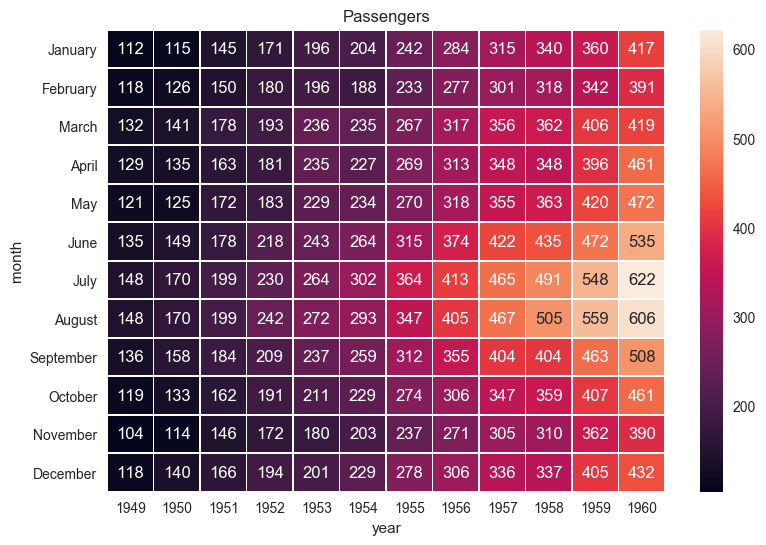

In [66]:
# Heatmaps
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))

#main command
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title('Passengers')

plt.show()

In [67]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


## 7. How to save your plots

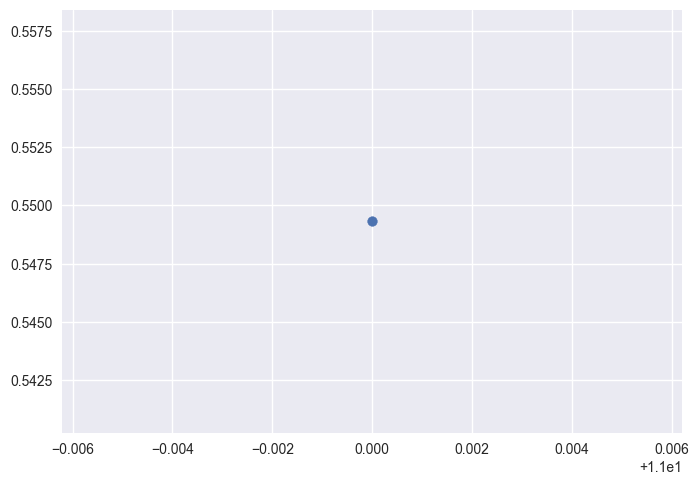

In [74]:
plt.figure()
plt.scatter(x,y)
plt.savefig("test.jpg",dpi=150)

You can easily save your nice figures by using

```python
plt.savefig('my_figure.png')
```
before calling 

```python
plt.show()
```

The resolution can be increase by increasing dpi values or saving in pdf or svg format.

```python
plt.savefig('my_figure.png', dpi=800)
plt.savefig('my_figure.svg')
```